In [71]:
import pandas as pd
from datetime import datetime
import yfinance as yf
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 1, 1), end=datetime(2024, 1, 1)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOG', 'GOOGL', 'TSLA', 'JNJ',
            'JPM', 'V', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'PYPL', 'VZ', 'NFLX',
            'ADBE', 'PFE', 'KO', 'T', 'MRK', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NKE',
            'ABT', 'MDT', 'MCD', 'CRM', 'XOM', 'WMT', 'BMY', 'ORCL', 'TMO', 'CVS',
            'UPS', 'COST', 'AMGN', 'HON', 'IBM', 'MMM', 'SBUX', 'CAT', 'GS', 'BLK']
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

(1006, 48)


,AAPL,MSFT,NVDA,AMZN,GOOG,GOOGL,TSLA,JNJ,JPM,V,...,UPS,COST,AMGN,HON,IBM,MMM,SBUX,CAT,GS,BLK
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,193.091385,373.215424,48.823704,153.419998,142.557770,141.327805,252.539993,153.051361,165.409225,257.472504,...,154.772156,654.652466,279.967346,203.438751,159.095825,86.848938,93.997040,287.971252,375.697876,792.247192
2023-12-26,192.542816,373.295135,49.272640,153.410004,142.657669,141.357773,256.609985,153.720825,166.387451,258.199799,...,154.556992,657.596313,279.711182,205.813049,160.145752,88.302818,94.381783,293.197906,376.645386,796.384033
2023-12-27,192.642548,372.707275,49.410622,153.339996,141.279236,140.209076,261.440002,153.927582,167.385437,257.970642,...,153.393143,664.754272,282.302399,206.782578,160.391052,88.817398,94.006905,295.667419,379.478088,802.939880
2023-12-28,193.071426,373.912842,49.515610,153.380005,141.119415,140.069244,253.179993,154.154007,168.274734,259.435211,...,153.852814,661.065613,284.203918,206.930984,160.675598,89.593346,94.638283,294.437622,381.382965,804.085144
2023-12-29,192.024185,374.670074,49.515610,151.940002,140.769806,139.529861,248.479996,154.311539,168.077118,259.385406,...,153.774567,658.054871,283.770386,207.465195,160.479355,89.291122,94.717209,293.237579,380.751282,801.508240


In [73]:
def plot_securities(sec1, sec2):
    plt.figure(figsize=(10, 6))
    plt.plot(d[sec1], label=sec1, color='red')
    plt.plot(d[sec2], label=sec2, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Price over Time between {sec1} and {sec2}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_spread_securities(sec1, sec2):
    plt.figure(figsize=(10, 6))
    plt.plot(d[sec1] - d[sec2], label='Price spread', color='red')
    plt.xlabel('Time')
    plt.ylabel('Price spread')
    plt.title(f'Price spread over Time between {sec1} and {sec2}')
    plt.legend()
    plt.grid(True)
    plt.show()

def compare_securities(sec1, sec2):
    plot_securities(sec1, sec2)
    plot_spread_securities(sec1, sec2)
    result = ts.coint(d[sec1], d[sec2])
    cointegration_t_statistic = result[0]
    p_val = result[1]
    critical_values_test_statistic_at_1_5_10 = result[2]
    print('We want the P val < 0.05 (meaning that cointegration exists)')
    print(f'P value for the augmented Engle-Granger two-step cointegration test for {sec1} and {sec2} is', p_val)

In [54]:
corr_matrix = d.corr()
corr_matrix

,AAPL,MSFT,NVDA,AMZN,GOOG,GOOGL,TSLA,JNJ,JPM,V,...,UPS,COST,AMGN,HON,IBM,MMM,SBUX,CAT,GS,BLK
AAPL,1.000000,0.939222,0.846877,0.172681,0.825041,0.827947,0.791094,0.745481,0.699732,0.759638,...,0.765770,0.928859,0.535873,0.639511,0.746122,-0.323062,0.543371,0.833546,0.777638,0.644587
MSFT,0.939222,1.000000,0.914212,0.274980,0.900243,0.902145,0.749935,0.640508,0.775224,0.795547,...,0.675407,0.881533,0.439931,0.615036,0.731441,-0.243224,0.582664,0.793123,0.777441,0.700195
NVDA,0.846877,0.914212,1.000000,0.123252,0.720493,0.722501,0.528309,0.444451,0.672548,0.774143,...,0.436383,0.802267,0.494282,0.419908,0.733670,-0.459055,0.454198,0.783264,0.571766,0.473101
AMZN,0.172681,0.274980,0.123252,1.000000,0.461402,0.456609,0.476776,-0.030136,0.278939,0.261024,...,0.336569,-0.023524,-0.240849,0.305700,-0.193484,0.674422,0.363615,0.021643,0.175182,0.549952
GOOG,0.825041,0.900243,0.720493,0.461402,1.000000,0.999489,0.842026,0.676102,0.829591,0.718827,...,0.763940,0.763346,0.252654,0.710741,0.593847,0.102426,0.634591,0.699755,0.842952,0.834707
GOOGL,0.827947,0.902145,0.722501,0.456609,0.999489,1.000000,0.846524,0.676726,0.826842,0.712218,...,0.761229,0.768141,0.248733,0.704866,0.590987,0.095618,0.627067,0.696869,0.840555,0.830025
TSLA,0.791094,0.749935,0.528309,0.476776,0.842026,0.846524,1.000000,0.677581,0.638457,0.471691,...,0.801794,0.715684,0.175281,0.653132,0.393242,0.134052,0.491052,0.584730,0.738089,0.742777
JNJ,0.745481,0.640508,0.444451,-0.030136,0.676102,0.676726,0.677581,1.000000,0.589741,0.531242,...,0.764972,0.755412,0.552471,0.678430,0.700324,-0.113749,0.436362,0.730980,0.803199,0.601609
JPM,0.699732,0.775224,0.672548,0.278939,0.829591,0.826842,0.638457,0.589741,1.000000,0.807668,...,0.654728,0.619260,0.296703,0.847346,0.661526,0.108581,0.835333,0.807641,0.892107,0.851412
V,0.759638,0.795547,0.774143,0.261024,0.718827,0.712218,0.471691,0.531242,0.807668,1.000000,...,0.576619,0.636716,0.532152,0.710341,0.764161,-0.108215,0.723338,0.827708,0.712820,0.680174


<Axes: >

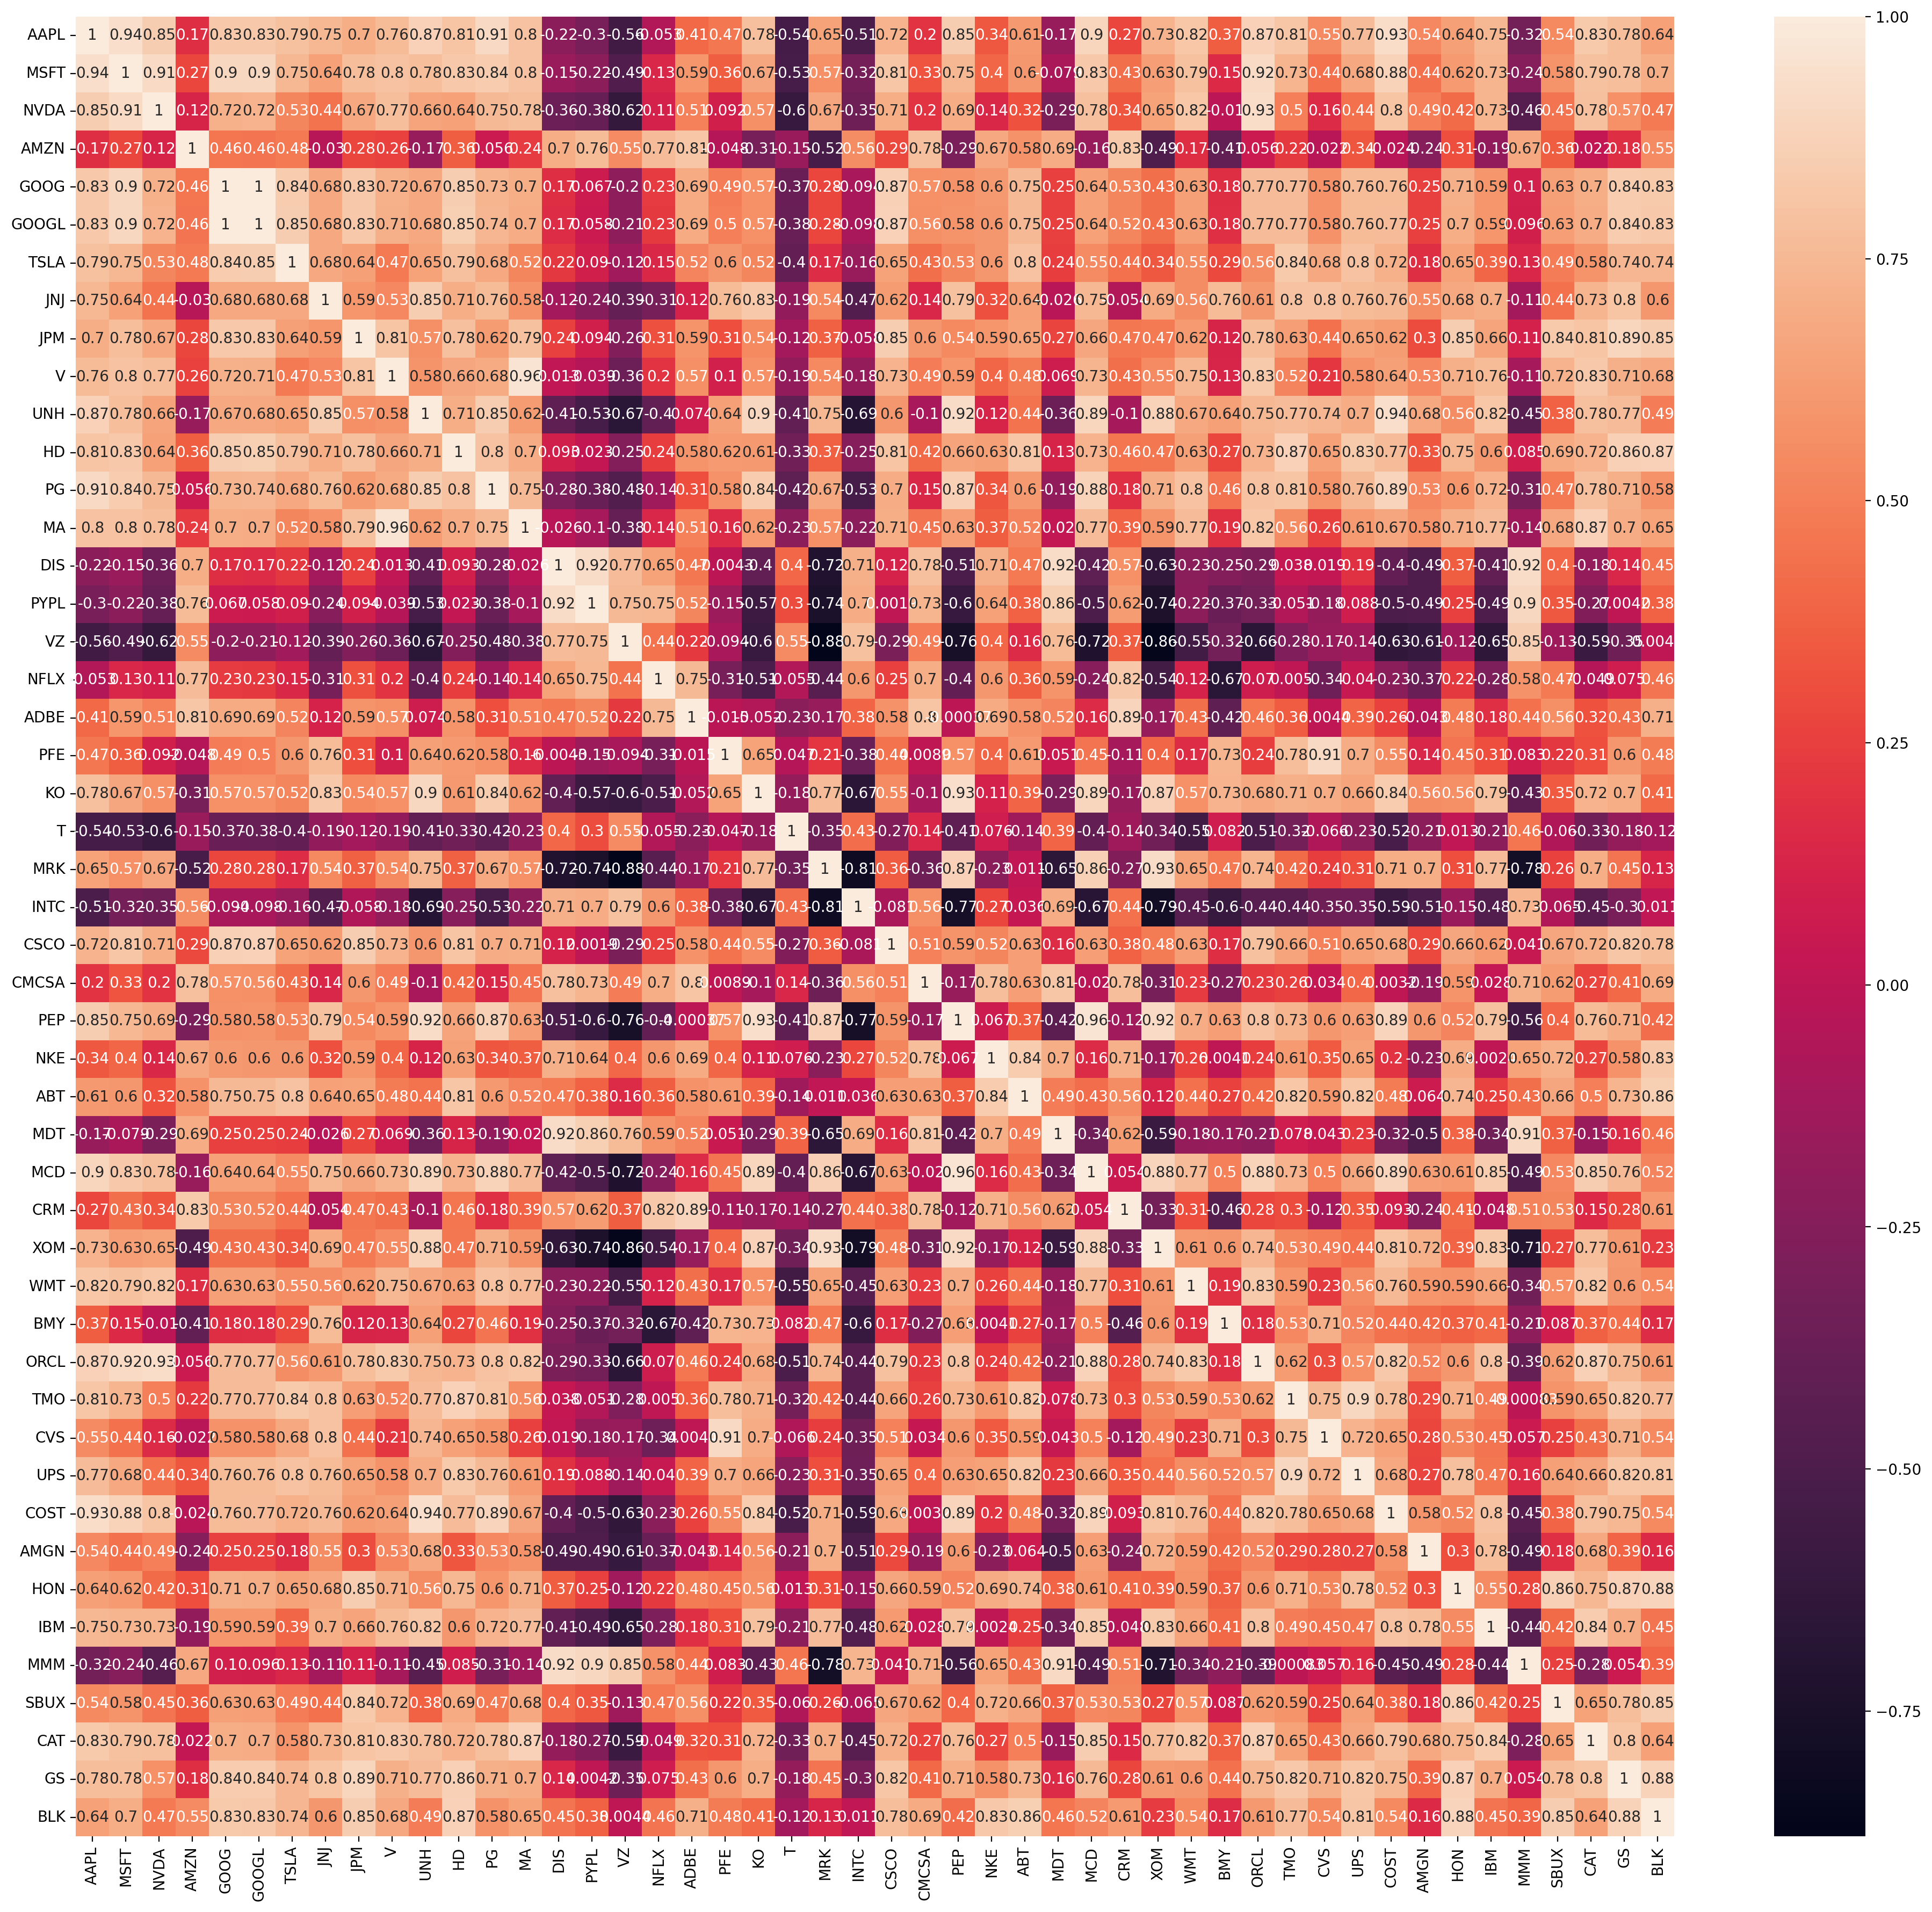

In [55]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(24, 22), dpi=200)
sn.heatmap(corr_matrix, annot = True)

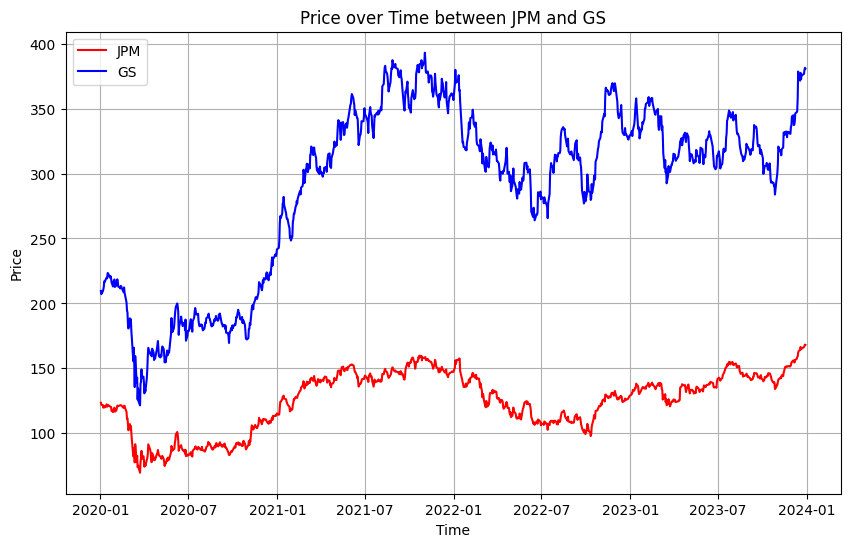

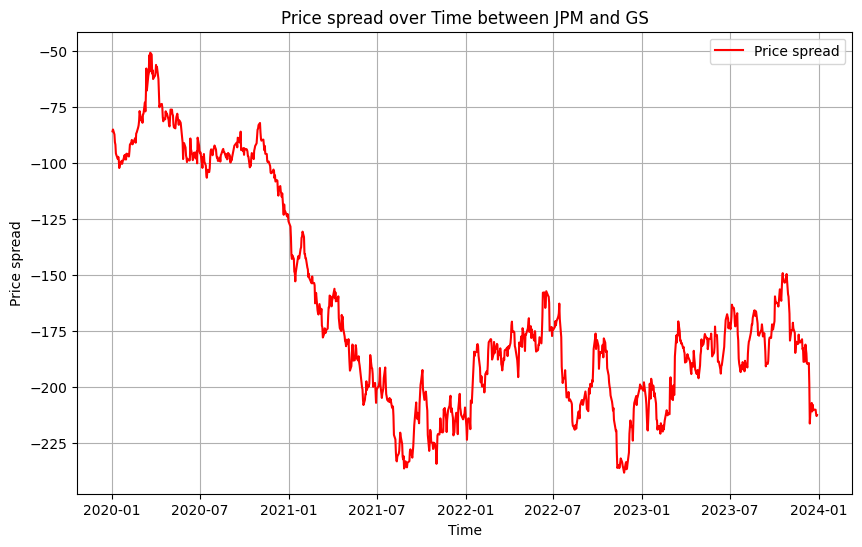

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test for JPM and GS is 0.6351974003229977


In [74]:
compare_securities('JPM', 'GS')